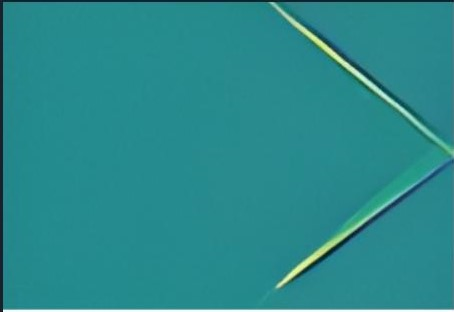

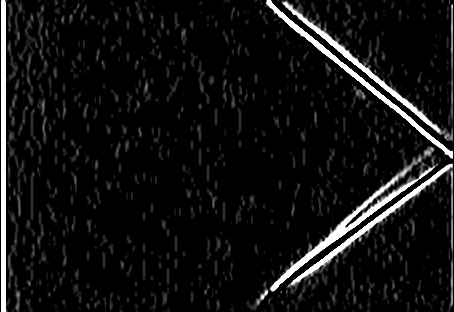

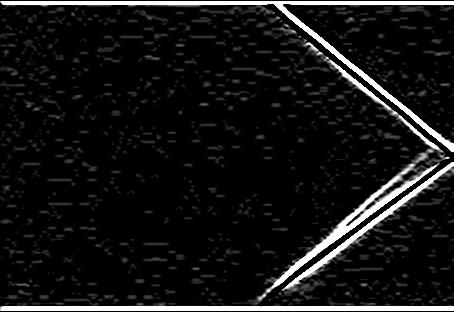

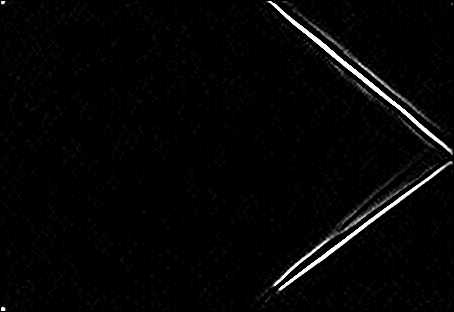

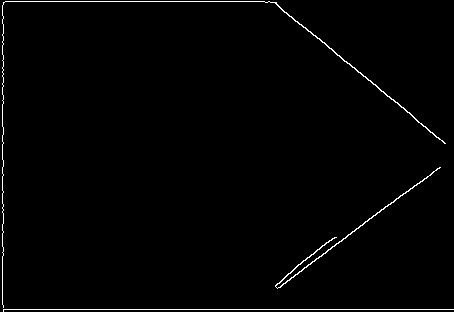

In [26]:
import cv2
from google.colab.patches import cv2_imshow
import numpy as np
img = cv2.imread('/content/POD.jpg')
cv2_imshow(img)


img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
img_blur = cv2.GaussianBlur(img_gray, (3,3), 0)

sobelx = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=0, ksize=5) 
sobely = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=0, dy=1, ksize=5) 
sobelxy = cv2.Sobel(src=img_blur, ddepth=cv2.CV_64F, dx=1, dy=1, ksize=5) 

cv2_imshow(sobelx)

cv2_imshow(sobely)

cv2_imshow(sobelxy)
edges = cv2.Canny(image=img_blur, threshold1=170, threshold2=600) 
cv2_imshow(edges)


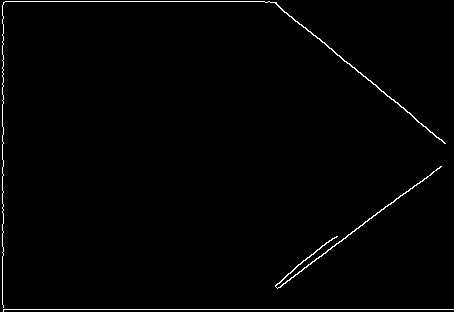

In [44]:
edges = cv2.Canny(image=img_blur, threshold1=160, threshold2=600) 
cv2_imshow(edges)

In [46]:
np.array(edges).shape

(312, 454)

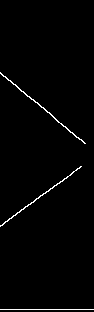

In [50]:
crop_img = edges[0:312, 360:454]
cv2_imshow(crop_img)

In [51]:
from skimage.transform import (hough_line, hough_line_peaks)
import matplotlib.pyplot as plt
hspace, angles, distances = hough_line(crop_img)

angle=[]
for _, a , distances in zip(*hough_line_peaks(hspace, angles, distances)):angle.append(a)

print("\n\nRadians : ", angle)

angles = [a*180/np.pi for a in angle]

print("\n\nDegree : ", angle)

print("\n\nMax of Angles : ", np.max(angles))
print("\n\nMin of Angles : ", np.min(angles))


angle_difference = np.max(angles) - np.min(angles)
print("\n\nInternal Angle between waves : ", angle_difference, "Degrees")



Radians :  [-0.8687644488977362, 0.938967636687452, 1.5707963267948966]


Degree :  [-0.8687644488977362, 0.938967636687452, 1.5707963267948966]


Max of Angles :  90.0


Min of Angles :  -49.77653631284917


Internal Angle between waves :  139.77653631284917 Degrees


In [52]:
import math

one_by_m = math.sin(angle_difference * 0.0174533)

print("\n\n1/M : ", one_by_m)



1/M :  0.6457696239681755


In [54]:
print("\n\nMach number : ", 1/0.6457)



Mach number :  1.5487068297971194
